In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Projects/MLOPS-Used-Cars Project/cleaned_scraped_used_cars_data.csv"

df = pd.read_csv(data_path)

In [3]:
df.head(3)

,mileage,buyer_rating,num_reviews,percent_recommend,price,year,brand,model,comfort_review,interior_review,performance_review,value_review,exterior_review,reliability_review,exterior_color,interior_color,drivetrain,average_mpg,fuel_type,transmission,accidents_or_damage,clean_title,one_owner_vehicle,personal_use_only,open_recall
0,61277.0,-5.0,-1032.0,-100.0,37450.0,2021.0,Ford,Expedition Max Limited,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,Gray,Ebony,Four-wheel Drive,18.5,Gasoline,10-Speed Automatic,At least 1 accident or damage reported,Unknown,Yes,No,Unknown
1,8970.0,5.0,1.0,100.0,275995.0,2021.0,Lamborghini,Huracan EVO Base,4.0,5.0,5.0,4.0,5.0,5.0,Arancio Borealis Pearl,Nero Ade,Rear-wheel Drive,15.5,Gasoline,7-Speed Automatic with Auto-Shift,None reported,Yes,Yes,Yes,Unknown
2,117260.0,4.4,11.0,81.0,9499.0,2014.0,Subaru,XV Crosstrek Hybrid 2.0i Hybrid,4.3,4.3,4.1,4.3,4.5,4.4,Plasma Green Pearl,Black,All-wheel Drive,31.0,Hybrid,Automatic CVT,At least 1 accident or damage reported,Yes,Yes,No,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14164 entries, 0 to 14163
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mileage              14164 non-null  float64
 1   buyer_rating         14164 non-null  float64
 2   num_reviews          14164 non-null  float64
 3   percent_recommend    14164 non-null  float64
 4   price                14164 non-null  float64
 5   year                 14164 non-null  float64
 6   brand                14164 non-null  object 
 7   model                14164 non-null  object 
 8   comfort_review       14164 non-null  float64
 9   interior_review      14164 non-null  float64
 10  performance_review   14164 non-null  float64
 11  value_review         14164 non-null  float64
 12  exterior_review      14164 non-null  float64
 13  reliability_review   14164 non-null  float64
 14  exterior_color       14164 non-null  object 
 15  interior_color       14164 non-null 

In [5]:
df.describe()

,mileage,buyer_rating,num_reviews,percent_recommend,price,year,comfort_review,interior_review,performance_review,value_review,exterior_review,reliability_review,average_mpg
count,1.416400e+04,14164.000000,14164.000000,14164.000000,1.416400e+04,14164.000000,14164.000000,14164.000000,14164.000000,14164.000000,14164.000000,14164.000000,12247.000000
mean,4.995597e+04,3.902019,-1.790525,75.119175,3.414162e+04,2019.108232,3.966740,3.933677,3.898313,3.775261,4.014544,3.845545,25.086633
std,3.903251e+04,2.534938,314.096061,51.388883,4.140143e+04,3.678811,2.544596,2.536035,2.531597,2.502201,2.554099,2.613073,5.901137
min,1.000000e+02,-5.000000,-1032.000000,-100.000000,2.800000e+03,1986.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,11.000000
25%,2.245300e+04,4.400000,8.000000,84.000000,1.877575e+04,2018.000000,4.500000,4.500000,4.400000,4.200000,4.600000,4.400000,21.500000
50%,3.799900e+04,4.700000,26.000000,92.000000,2.599500e+04,2020.000000,4.700000,4.700000,4.700000,4.500000,4.800000,4.700000,24.000000
75%,6.875500e+04,4.800000,84.000000,96.000000,3.599825e+04,2021.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.800000,28.500000
max,1.182285e+06,5.000000,1032.000000,100.000000,1.750000e+06,2024.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,78.500000


### Distribution of prices and log of prices

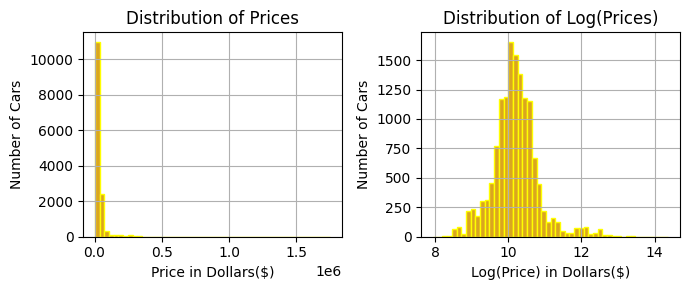

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

df["price"].hist(ax=axs[0], bins=50, color="goldenrod", edgecolor="yellow")
axs[0].set_xlabel("Price in Dollars($)")
axs[0].set_ylabel("Number of Cars")
axs[0].set_title("Distribution of Prices")

df["price"].apply(np.log).hist(ax=axs[1], bins=50, color="goldenrod", edgecolor="yellow")
axs[1].set_xlabel("Log(Price) in Dollars($)")
axs[1].set_ylabel("Number of Cars")
axs[1].set_title("Distribution of Log(Prices)")

plt.tight_layout()
plt.grid(True)
plt.show()

### Outliers in the price column, get the 99th percentile price

In [7]:
print("99th percentile price:", df["price"].quantile(q=0.99))

luxury_cars = df[df["price"] >= 230000]
print("\nBrands with cars costing 230K or more:\n", luxury_cars["brand"].unique())

print("\nPrices sorted in reverse order of cars costing 230K or more:")
print(sorted(list(luxury_cars["price"]), reverse=True))

99th percentile price: 229924.01999999883

Brands with cars costing 230K or more:
 ['Lamborghini' 'Rolls-Royce' 'Ferrari' 'McLaren' 'Bentley' 'Alfa'
 'Porsche' 'Aston Martin']

Prices sorted in reverse order of cars costing 230K or more:
[1750000.0, 716850.0, 689900.0, 688550.0, 645000.0, 578000.0, 574995.0, 574500.0, 573880.0, 524995.0, 479995.0, 459999.0, 445900.0, 439999.0, 429999.0, 429995.0, 429900.0, 429900.0, 425750.0, 425500.0, 419900.0, 399900.0, 394000.0, 389999.0, 384900.0, 374900.0, 359900.0, 359900.0, 349995.0, 349900.0, 345900.0, 339995.0, 339900.0, 338900.0, 338900.0, 335900.0, 329999.0, 329900.0, 329888.0, 325900.0, 318995.0, 318344.0, 315995.0, 305995.0, 299999.0, 299900.0, 298795.0, 295900.0, 294330.0, 291070.0, 289995.0, 289900.0, 289680.0, 288800.0, 285900.0, 284900.0, 275995.0, 275995.0, 275900.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 274950.0, 

### Remove one extreme outlier in the price column

In [8]:
extreme_price_index = df[df["price"] == 1750000.0].index
df.drop(labels=extreme_price_index, inplace=True)

### Plot price again after removing one extreme outlier

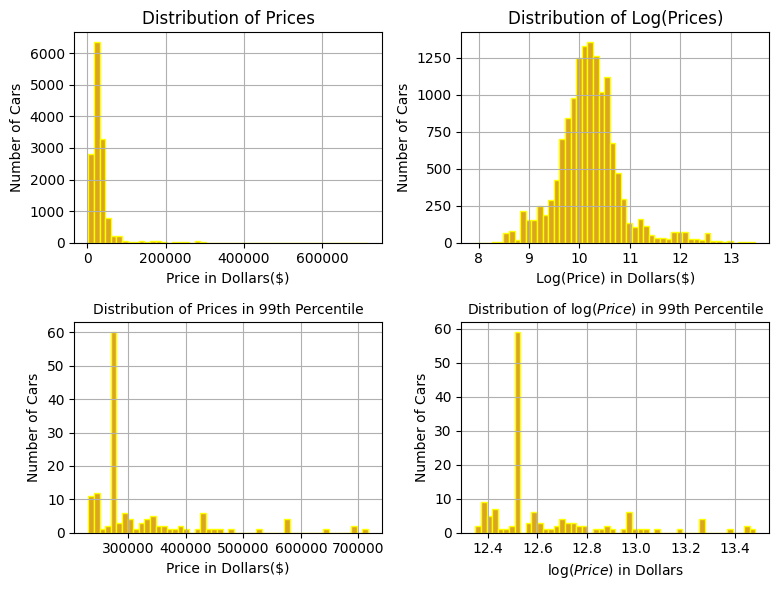

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

df["price"].hist(ax=axs[0][0], bins=50, color="goldenrod", edgecolor="yellow")
axs[0][0].set_xlabel("Price in Dollars($)")
axs[0][0].set_ylabel("Number of Cars")
axs[0][0].set_title("Distribution of Prices")

df["price"].apply(np.log).hist(ax=axs[0][1], bins=50, color="goldenrod", edgecolor="yellow")
axs[0][1].set_xlabel("Log(Price) in Dollars($)")
axs[0][1].set_ylabel("Number of Cars")
axs[0][1].set_title("Distribution of Log(Prices)")

df[df["price"] >= 230000]["price"].hist(ax=axs[1][0], bins=50, color="goldenrod", edgecolor="yellow")
axs[1][0].set_xlabel("Price in Dollars($)")
axs[1][0].set_ylabel("Number of Cars")
axs[1][0].set_title("Distribution of Prices in 99th Percentile", fontsize=10)

df[df["price"] >= 230000]["price"].apply(np.log).hist(ax=axs[1][1], bins=50, color="goldenrod", edgecolor="yellow")
axs[1][1].set_xlabel("$ \log (Price) $ in Dollars")
axs[1][1].set_ylabel("Number of Cars")
axs[1][1].set_title("Distribution of $ \log (Price) $ in 99th Percentile", fontsize=10)

plt.tight_layout()
plt.grid(True)
plt.show()

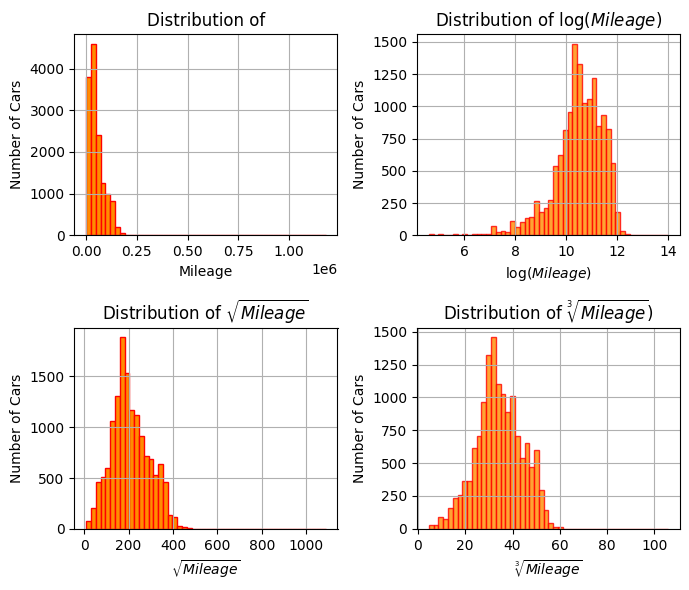

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))

df["mileage"].hist(ax=axs[0][0], bins=50, color="darkorange", edgecolor="red")
axs[0][0].set_xlabel("Mileage")
axs[0][0].set_ylabel("Number of Cars")
axs[0][0].set_title("Distribution of")

df["mileage"].apply(np.log).hist(ax=axs[0][1], bins=50, color="darkorange", alpha=0.8, edgecolor="red")
axs[0][1].set_xlabel("$ \log (Mileage) $")
axs[0][1].set_ylabel("Number of Cars")
axs[0][1].set_title("Distribution of $ \log (Mileage) $")

df["mileage"].apply(np.sqrt).hist(ax=axs[1][0], bins=50, color="darkorange", edgecolor="red")
axs[1][0].set_xlabel("$ \sqrt{Mileage} $")
axs[1][0].set_ylabel("Number of Cars")
axs[1][0].set_title("Distribution of $ \sqrt{Mileage} $")

df["mileage"].apply(np.cbrt).hist(ax=axs[1][1], bins=50, color="darkorange", alpha=0.8, edgecolor="red")
axs[1][1].set_xlabel("$ \sqrt[3]{Mileage} $")
axs[1][1].set_ylabel("Number of Cars")
axs[1][1].set_title("Distribution of $ \sqrt[3]{Mileage} $)")

plt.tight_layout()
plt.grid(True)
plt.show()

### Outliers in mileage column, get 99th percentile

In [11]:
print("99th percentile mileage:", df["mileage"].quantile(q=.99))

heavily_driven = df[df["mileage"] >= 160000]["mileage"]
print("\nCars driven 160K miles or more:\n", sorted(list(heavily_driven), reverse=True))

99th percentile mileage: 159842.0

Cars driven 160K miles or more:
 [1182285.0, 298517.0, 267591.0, 229450.0, 229112.0, 226395.0, 225490.0, 221587.0, 220170.0, 218000.0, 214615.0, 212690.0, 210496.0, 209605.0, 209006.0, 207103.0, 206209.0, 204599.0, 202729.0, 202568.0, 200000.0, 199921.0, 198678.0, 198207.0, 197766.0, 195061.0, 195000.0, 189845.0, 189252.0, 188395.0, 187793.0, 187396.0, 187138.0, 186550.0, 186066.0, 185838.0, 185280.0, 184525.0, 184473.0, 183894.0, 182550.0, 182133.0, 180838.0, 180712.0, 180010.0, 179766.0, 179573.0, 179090.0, 179000.0, 178408.0, 176356.0, 176303.0, 175662.0, 174291.0, 173626.0, 173064.0, 173006.0, 172850.0, 172850.0, 172485.0, 172475.0, 172475.0, 172193.0, 172000.0, 172000.0, 171072.0, 170833.0, 170354.0, 170223.0, 169866.0, 169770.0, 169636.0, 169014.0, 168665.0, 168631.0, 167746.0, 167543.0, 167459.0, 167452.0, 167368.0, 167300.0, 167253.0, 167134.0, 167000.0, 166881.0, 166658.0, 166583.0, 166040.0, 165583.0, 165573.0, 165291.0, 165291.0, 165063.0, 

### Remove one extreme (unrealistic) outlier in mileage column

In [12]:
faulty_mileage_index = df[df["mileage"] == 1182285.0].index
df.drop(labels=faulty_mileage_index, inplace=True)

### Plot mileage again with faulty value removed

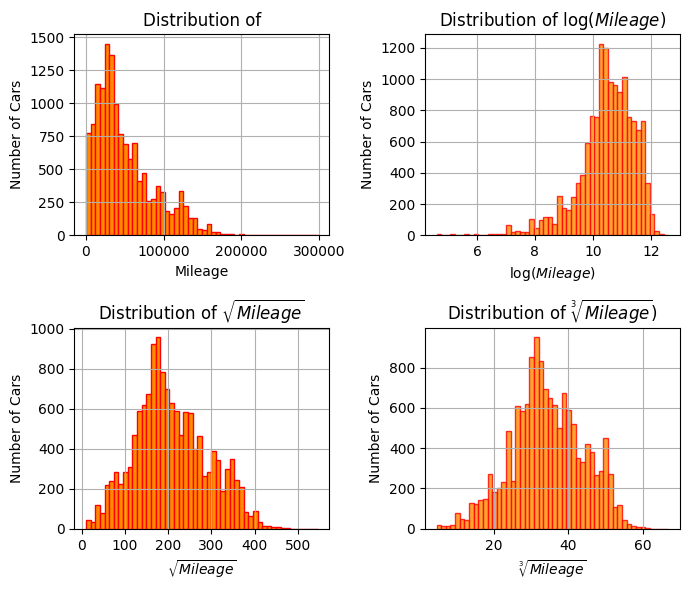

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))

df["mileage"].hist(ax=axs[0][0], bins=50, color="darkorange", edgecolor="red")
axs[0][0].set_xlabel("Mileage")
axs[0][0].set_ylabel("Number of Cars")
axs[0][0].set_title("Distribution of")

df["mileage"].apply(np.log).hist(ax=axs[0][1], bins=50, color="darkorange", alpha=0.8, edgecolor="red")
axs[0][1].set_xlabel("$ \log (Mileage) $")
axs[0][1].set_ylabel("Number of Cars")
axs[0][1].set_title("Distribution of $ \log (Mileage) $")

df["mileage"].apply(np.sqrt).hist(ax=axs[1][0], bins=50, color="darkorange", edgecolor="red")
axs[1][0].set_xlabel("$ \sqrt{Mileage} $")
axs[1][0].set_ylabel("Number of Cars")
axs[1][0].set_title("Distribution of $ \sqrt{Mileage} $")

df["mileage"].apply(np.cbrt).hist(ax=axs[1][1], bins=50, color="darkorange", alpha=0.8, edgecolor="red")
axs[1][1].set_xlabel("$ \sqrt[3]{Mileage} $")
axs[1][1].set_ylabel("Number of Cars")
axs[1][1].set_title("Distribution of $ \sqrt[3]{Mileage} $)")

plt.tight_layout()
plt.grid(True)
plt.show()

### Miles per gallon, ratings, num_reviews, percent recommend distribution plots

In [14]:
unique_mpg = sorted(df["average_mpg"].unique(), reverse=True)
print("Miles Per Gallon")
print("Number of unique MPG:", len(unique_mpg))
print(unique_mpg)

print("-" * 100)
print("Ratings")
print("Number of unique values for ratings:", len(df[df["buyer_rating"] != -5.0]["buyer_rating"].unique()))

print("-" * 100)
print("Recommendations")
print("Number of unique values for recommendations:", len(df[df["percent_recommend"] != -100.0]["percent_recommend"].unique()))

print("-" * 100)
print("Year")
print("min year:", df["year"].min())
print("max year:", df["year"].max())

Miles Per Gallon
Number of unique MPG: 86
[nan, 78.5, 76.0, 58.0, 55.5, 54.5, 54.0, 53.5, 52.5, 52.0, 50.5, 49.5, 49.0, 48.0, 47.5, 47.0, 46.5, 46.0, 45.5, 44.0, 43.5, 43.0, 42.5, 42.0, 41.5, 41.0, 40.5, 40.0, 39.5, 39.0, 38.5, 38.0, 37.5, 37.0, 36.5, 36.0, 35.5, 35.0, 34.5, 34.0, 33.5, 33.0, 32.5, 32.0, 31.5, 31.0, 30.5, 30.0, 29.5, 29.0, 28.5, 28.0, 27.5, 27.0, 26.5, 26.0, 25.5, 25.0, 24.5, 24.0, 23.5, 23.0, 22.5, 22.0, 21.5, 21.0, 20.5, 20.0, 19.5, 19.0, 18.5, 18.0, 17.5, 17.0, 16.5, 16.0, 15.5, 15.0, 14.5, 14.0, 13.5, 13.0, 12.5, 12.0, 11.5, 11.0]
----------------------------------------------------------------------------------------------------
Ratings
Number of unique values for ratings: 29
----------------------------------------------------------------------------------------------------
Recommendations
Number of unique values for recommendations: 61
----------------------------------------------------------------------------------------------------
Year
min year: 1986.0
max y

### Plot of buyer ratings

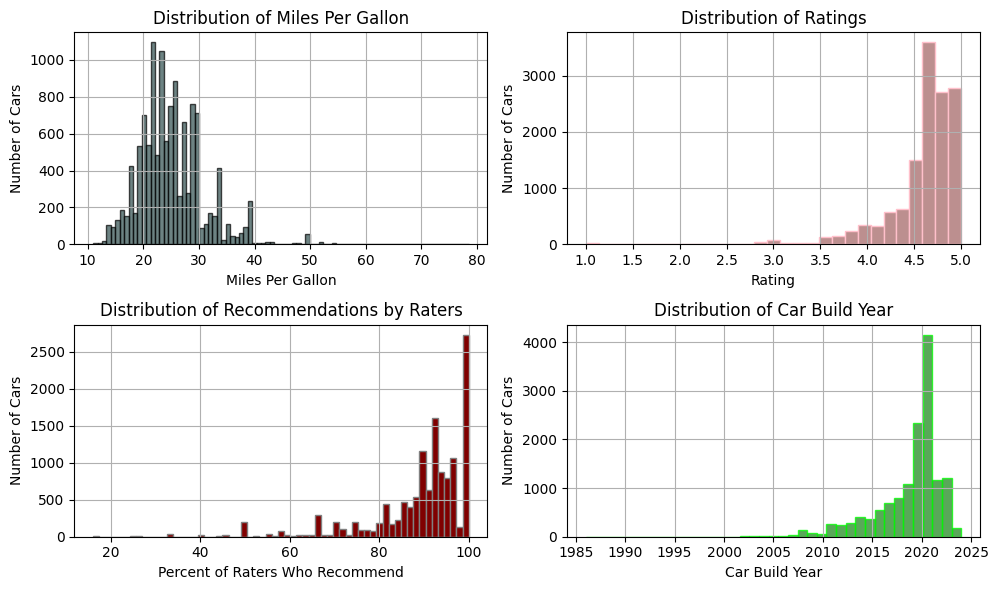

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

df[df["average_mpg"] != -1.0]["average_mpg"].hist(ax=axs[0][0], bins=85, color="darkslategrey", alpha=0.7, edgecolor="black")
axs[0][0].set_title("Distribution of Miles Per Gallon")
axs[0][0].set_xlabel("Miles Per Gallon")
axs[0][0].set_ylabel("Number of Cars")

df[df["buyer_rating"] != -5.0]["buyer_rating"].hist(ax=axs[0][1], bins=29, color="rosybrown", edgecolor="pink")
axs[0][1].set_title("Distribution of Ratings")
axs[0][1].set_xlabel("Rating")
axs[0][1].set_ylabel("Number of Cars")

df[df["percent_recommend"] != -100.0]["percent_recommend"].hist(ax=axs[1][0], bins=61, color="maroon", edgecolor="gray")
axs[1][0].set_title("Distribution of Recommendations by Raters")
axs[1][0].set_xlabel("Percent of Raters Who Recommend")
axs[1][0].set_ylabel("Number of Cars")

df["year"].hist(ax=axs[1][1], bins=39, color="forestgreen", alpha=0.75, edgecolor="lime")
axs[1][1].set_title("Distribution of Car Build Year")
axs[1][1].set_xlabel("Car Build Year")
axs[1][1].set_ylabel("Number of Cars")

plt.tight_layout()
plt.show()

In [16]:
temp_df = df[(df["buyer_rating"] != -5.0) & (df["num_reviews"] != -1032) & (df["percent_recommend"] != -100.0) & (df["average_mpg"] != -1.0)]
temp_df = temp_df[["mileage", "buyer_rating",	"num_reviews", "percent_recommend", "price", "year", "average_mpg"]]
print(temp_df.shape)
temp_df.head(3)

(13085, 7)


,mileage,buyer_rating,num_reviews,percent_recommend,price,year,average_mpg
1,8970.0,5.0,1.0,100.0,275995.0,2021.0,15.5
2,117260.0,4.4,11.0,81.0,9499.0,2014.0,31.0
3,135098.0,4.5,23.0,91.0,8995.0,2015.0,27.0


### Correlation matrix of mileage, buyer_rating, num_reviews, percent_recommend, price, year columns

In [17]:
_correlation_matrix = temp_df.corr()
_correlation_matrix

,mileage,buyer_rating,num_reviews,percent_recommend,price,year,average_mpg
mileage,1.000000,-0.043903,0.237356,0.044520,-0.380770,-0.653360,-0.104193
buyer_rating,-0.043903,1.000000,0.052844,0.853211,0.102976,-0.028944,0.034538
num_reviews,0.237356,0.052844,1.000000,0.055798,-0.202188,-0.201571,0.124755
percent_recommend,0.044520,0.853211,0.055798,1.000000,0.066256,-0.090236,0.020875
price,-0.380770,0.102976,-0.202188,0.066256,1.000000,0.228838,-0.279073
year,-0.653360,-0.028944,-0.201571,-0.090236,0.228838,1.000000,0.186563
average_mpg,-0.104193,0.034538,0.124755,0.020875,-0.279073,0.186563,1.000000


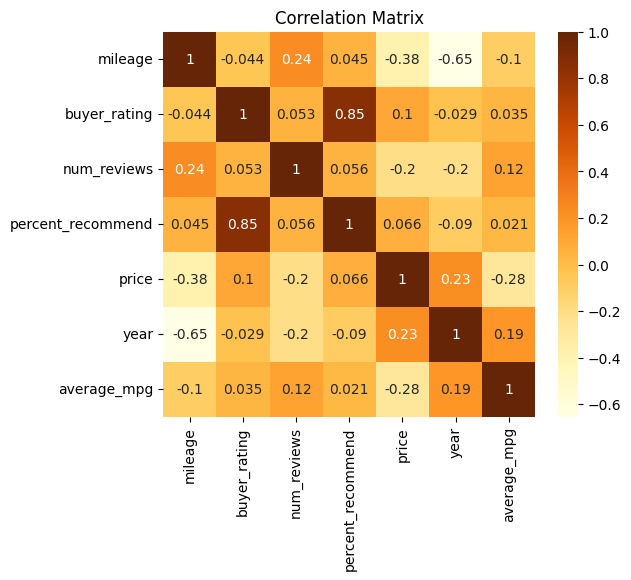

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(_correlation_matrix, annot=True, cmap=sns.color_palette("YlOrBr", as_cmap=True)) # plt.cm.BuGn, plt.cm.YlGnBu
plt.title("Correlation Matrix")
plt.show()

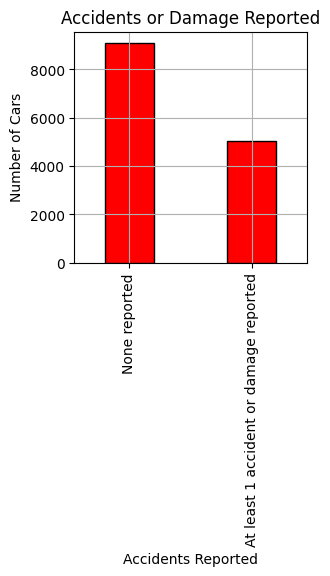

In [19]:
plt.figure(figsize=(3, 3))
df["accidents_or_damage"].value_counts().plot(kind="bar", color="red", edgecolor="black", width=0.4)
plt.xlabel("Accidents Reported")
plt.ylabel("Number of Cars")
plt.title("Accidents or Damage Reported")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

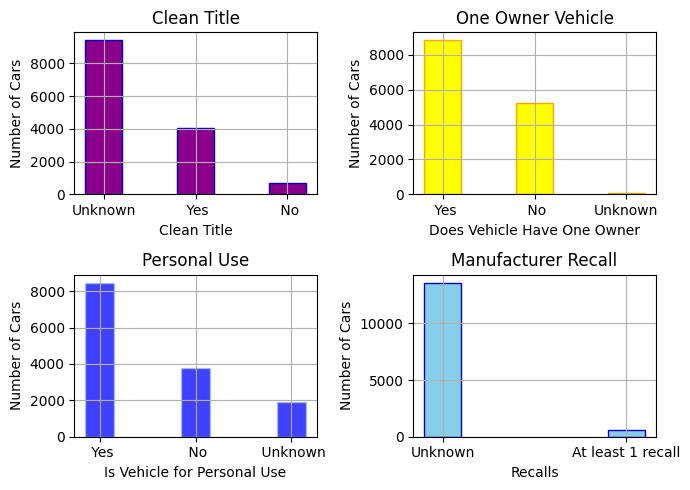

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

axs[0][0].bar(x=list(df["clean_title"].value_counts().keys()),
              height=list(df["clean_title"].value_counts().values),
              color="darkmagenta", edgecolor="mediumblue", width=0.4)
axs[0][0].set_xlabel("Clean Title")
axs[0][0].set_ylabel("Number of Cars")
axs[0][0].set_title("Clean Title")
axs[0][0].grid(True)

axs[0][1].bar(x=list(df["one_owner_vehicle"].value_counts().keys()),
              height=list(df["one_owner_vehicle"].value_counts().values),
              color="yellow", edgecolor="orange", width=0.4)
axs[0][1].set_xlabel("Does Vehicle Have One Owner")
axs[0][1].set_ylabel("Number of Cars")
axs[0][1].set_title("One Owner Vehicle")
axs[0][1].grid(True)

axs[1][0].bar(x=list(df["personal_use_only"].value_counts().keys()),
              height=list(df["personal_use_only"].value_counts().values),
              color="blue", alpha=0.75, edgecolor="lightsteelblue", width=0.3)
axs[1][0].set_xlabel("Is Vehicle for Personal Use")
axs[1][0].set_ylabel("Number of Cars")
axs[1][0].set_title("Personal Use")
axs[1][0].grid(True)

axs[1][1].bar(x=list(df["open_recall"].value_counts().keys()),
              height=list(df["open_recall"].value_counts().values),
              color="skyblue", edgecolor="mediumblue", width=0.2)
axs[1][1].set_xlabel("Recalls")
axs[1][1].set_ylabel("Number of Cars")
axs[1][1].set_title("Manufacturer Recall")
axs[1][1].grid(True)

plt.tight_layout()
plt.show()

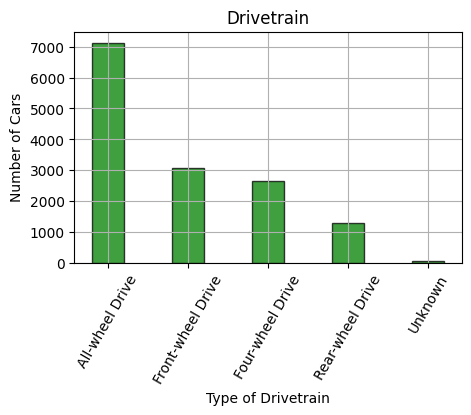

In [21]:
plt.figure(figsize=(5, 3))
plt.bar(x=list(df["drivetrain"].value_counts().keys()),
        height=list(df["drivetrain"].value_counts().values),
        color="green", alpha=0.75, edgecolor="black", width=0.4)
plt.xlabel("Type of Drivetrain")
plt.ylabel("Number of Cars")
plt.title("Drivetrain")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()